# Dataset on Amazon's Top 50 bestselling books from 2009 to 2019. 

## Contains 550 books, data has been categorized into fiction and non-fiction using Goodreads

In [192]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [193]:
sns.set_style("dark")


Let's start by loading in the data

In [194]:
topsellers_data = pd.read_csv('bestsellers with categories.csv')
#Rearranging data
topsellers_data = topsellers_data.sort_values(by = 'Year')

In [195]:
topsellers_data.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
177,"I, Alex Cross",James Patterson,4.6,1320,7,2009,Fiction
131,Glenn Beck's Common Sense: The Case Against an...,Glenn Beck,4.6,1365,11,2009,Non Fiction
417,The Last Lecture,Randy Pausch,4.7,4028,9,2009,Non Fiction
241,New Moon (The Twilight Saga),Stephenie Meyer,4.6,5680,10,2009,Fiction
72,Diary of a Wimpy Kid: The Last Straw (Book 3),Jeff Kinney,4.8,3837,15,2009,Fiction


In [196]:
topsellers_data.info() #No nulls 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 550 entries, 177 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 34.4+ KB


In [197]:
topsellers_data.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


Text(0.5, 1.0, 'Distribution of Price Across All Books')

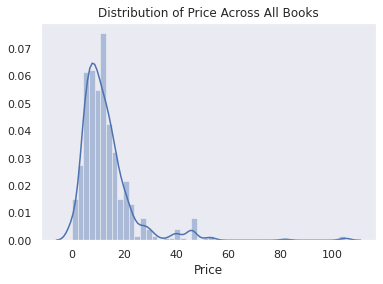

In [198]:
sns.distplot(topsellers_data['Price'])
plt.title('Distribution of Price Across All Books')

Most books are less than $20

Text(0.5, 1.0, 'Distribution of User Ratings Across All Books')

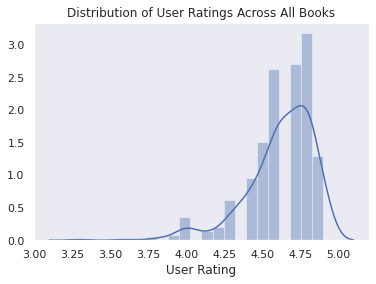

In [199]:
sns.distplot(topsellers_data['User Rating'])
plt.title('Distribution of User Ratings Across All Books')

It makes sense that the top selling books would have relatively high ratings.

<AxesSubplot:xlabel='User Rating', ylabel='Price'>

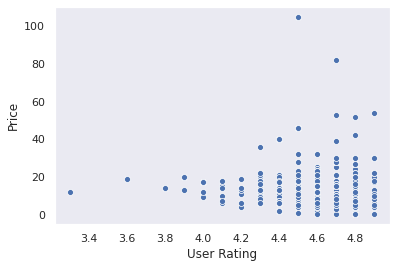

In [200]:
sns.scatterplot(data = topsellers_data, y = 'Price', x = 'User Rating')

<AxesSubplot:xlabel='Price', ylabel='Reviews'>

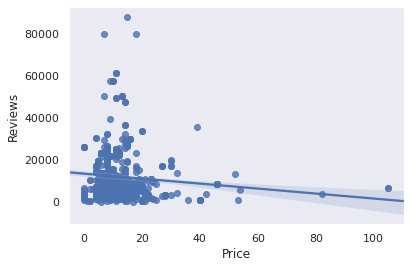

In [201]:
sns.regplot(data = topsellers_data, x = 'Price', y = 'Reviews')

Text(0.5, 1.0, 'Average Price of Books per Year by Genre')

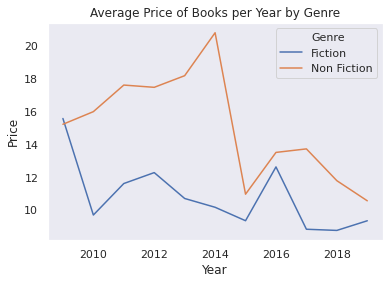

In [202]:
#A plot of Mean price of books per year
avgprice = topsellers_data.groupby(['Year', 'Genre'])['Price'].mean().reset_index()
sns.lineplot(data = avgprice, x = 'Year', y = 'Price', hue = 'Genre')
plt.title('Average Price of Books per Year by Genre')

Text(0.5, 1.0, 'Average User Rating of Books per Year by Genre')

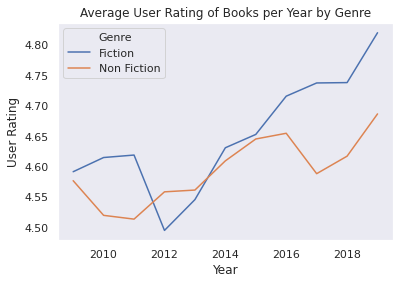

In [203]:
#A plot of Mean rating of books per year
avgprice = topsellers_data.groupby(['Year', 'Genre'])['User Rating'].mean().reset_index()
sns.lineplot(data = avgprice, x = 'Year', y = 'User Rating', hue = 'Genre')
plt.title('Average User Rating of Books per Year by Genre')

Text(0.5, 1.0, 'Average Number of Reviews of Books per Year by Genre')

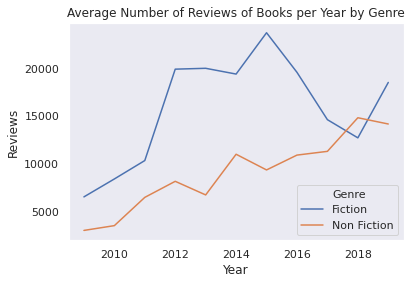

In [204]:
#A plot of Mean reviews of books per year
avgprice = topsellers_data.groupby(['Year', 'Genre'])['Reviews'].mean().reset_index()
sns.lineplot(data = avgprice, x = 'Year', y = 'Reviews', hue = 'Genre')
plt.title('Average Number of Reviews of Books per Year by Genre')

In [205]:
nonficnum = []
years = []
for year in range(2009,2020):
    temp = topsellers_data[(topsellers_data['Year'] == year) & (topsellers_data['Genre'] == 'Non Fiction')]
    nonficnum.append(len(temp))
    years.append(year)
nonficdf = pd.DataFrame({'Year': years, 'Number of NonFiction': nonficnum})
nonficdf

,Year,Number of NonFiction
0,2009,26
1,2010,30
2,2011,29
3,2012,29
4,2013,26
5,2014,21
6,2015,33
7,2016,31
8,2017,26
9,2018,29


In [206]:
ficnum = []
years = []
for year in range(2009,2020):
    temp = topsellers_data[(topsellers_data['Year'] == year) & (topsellers_data['Genre'] == 'Fiction')]
    ficnum.append(len(temp))
    years.append(year)
ficdf = pd.DataFrame({'Year': years, 'Number of Fiction': ficnum})
ficdf

,Year,Number of Fiction
0,2009,24
1,2010,20
2,2011,21
3,2012,21
4,2013,24
5,2014,29
6,2015,17
7,2016,19
8,2017,24
9,2018,21


In [207]:
Genre_by_year =nonficdf.merge(ficdf, on = 'Year')
Genre_by_year

,Year,Number of NonFiction,Number of Fiction
0,2009,26,24
1,2010,30,20
2,2011,29,21
3,2012,29,21
4,2013,26,24
5,2014,21,29
6,2015,33,17
7,2016,31,19
8,2017,26,24
9,2018,29,21


Text(0.5, 1.0, 'Number of Best Selling Fiction Books Each Year')

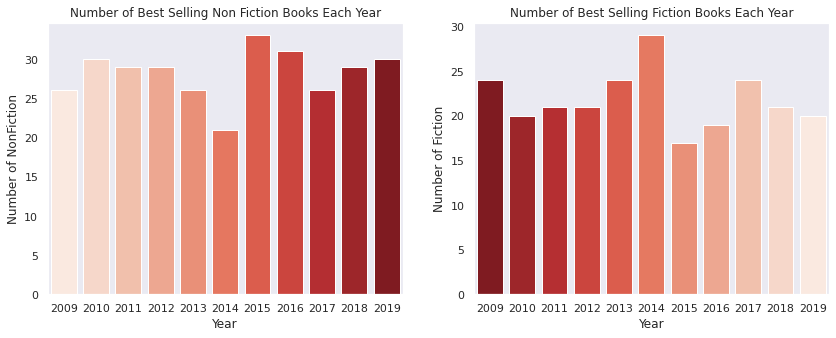

In [208]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.barplot(data = Genre_by_year, x = 'Year', y = 'Number of NonFiction', palette = 'Reds')
plt.title('Number of Best Selling Non Fiction Books Each Year')

plt.subplot(1,2,2)
sns.barplot(data = Genre_by_year, x = 'Year', y = 'Number of Fiction', palette = 'Reds_r')
plt.title('Number of Best Selling Fiction Books Each Year')


<AxesSubplot:ylabel='User Rating'>

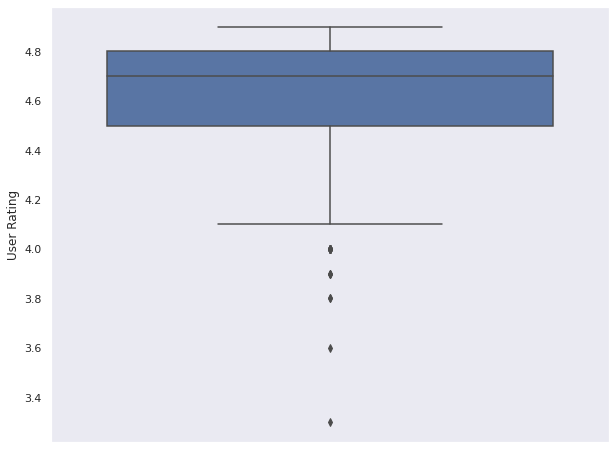

In [210]:
plt.figure(figsize = (10,8))
sns.boxplot(topsellers_data['User Rating'],orient = 'v' )

**Analyze the number of authors who appear in the Top Sellers list the most**

<AxesSubplot:>

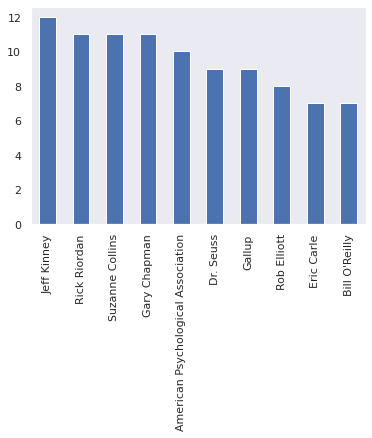

In [211]:
topsellers_data['Author'].value_counts().head(10).plot(kind = 'bar')

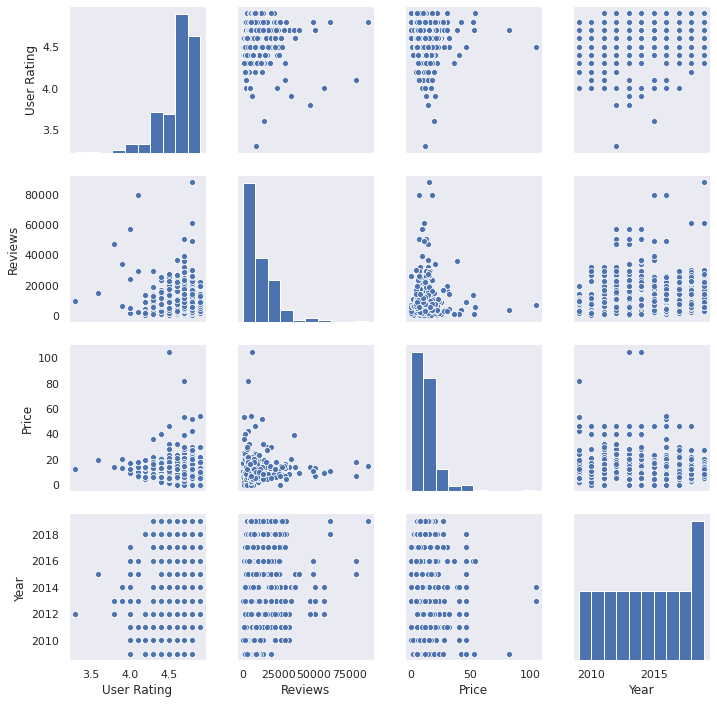

In [212]:
sns.pairplot(topsellers_data)

## Setting Up a Simple Book Recommendation Code

In [213]:
Recommenddf = topsellers_data.copy()

Ratings= []
for rating in testdf['User Rating']:
    if rating >3 and rating <=3.5:
        Ratings.append('Okay')
    elif rating > 3.6 and rating <=4:
        Ratings.append('Good')
    elif rating > 4.1 and rating <=4.5:
        Ratings.append('Great')
    else:
        Ratings.append('Excellent')

In [214]:
Ratings = pd.Series(Ratings)

In [215]:
Recommenddf = pd.concat([Recommenddf, Ratings], axis = 1)
Recommenddf = Recommenddf.rename(columns = {0: 'Ratings'})

In [246]:
Recommenddf

,Name,Author,User Rating,Reviews,Price,Year,Genre,Ratings
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,Excellent
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,Excellent
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,Excellent
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction,Excellent
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction,Excellent
...,...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction,Excellent
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction,Excellent
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction,Great
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction,Excellent


In [247]:
#Create dfs for each book rating
Okaybooks = Recommenddf[Recommenddf['Ratings']== 'Okay'][['Name','Author']]
Goodbooks = Recommenddf[Recommenddf['Ratings']== 'Good'][['Name','Author']]
Greatbooks = Recommenddf[Recommenddf['Ratings']== 'Great'][['Name','Author']]
Excellentbooks = Recommenddf[Recommenddf['Ratings']== 'Excellent'][['Name','Author']]

In [278]:
import time

In [ ]:
def getbookreq():
    bookreq = input('Would you like an \nOkay, \nGood, \nGreat or \nExcellent \nbook rec?\n')

    if bookreq == 'Okay':
        thebook = pd.DataFrame(Okaybooks.sample())
        print("There's only 1!")
        time.sleep(3)
        print('Try: {} by {}'.format(thebook['Name'].iloc[0],thebook['Author'].iloc[0]))

    elif bookreq == 'Good':

        thebook = pd.DataFrame(Goodbooks.sample())
        print('Picking from {} Good books!'.format(len(Goodbooks)))
        time.sleep(3)
        print('Try: {} by {}'.format(thebook['Name'].iloc[0],thebook['Author'].iloc[0]))

    elif bookreq == 'Great':

        thebook = pd.DataFrame(Greatbooks.sample())
        print('Picking from {} Great books!'.format(len(Greatbooks)))
        time.sleep(3)
        print('Try: {} by {}'.format(thebook['Name'].iloc[0],thebook['Author'].iloc[0]))

    elif bookreq == 'Excellent':

        thebook = pd.DataFrame(Excellentbooks.sample())
        print('Picking from {} Excellent books!'. format(len(Excellentbooks)))
        time.sleep(3)
        print('Try: {} by {}'.format(thebook['Name'].iloc[0],thebook['Author'].iloc[0]))  

    else:
        print("Please enter 'Okay', 'Good', 'Great' or 'Excellent'")
    
    goodchoice = input('Have you read this book already? [y/n]')
    if goodchoice == 'y':
        print("Oh no! Pick another then!")
        time.sleep(2)
        getbookreq()
       
    else: 
        print('Great! Happy Reading!')

In [ ]:
getbookreq()